<a href="https://colab.research.google.com/github/jatinpandey02/facial-keypoints/blob/master/facial_keypoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
!pip install livelossplot
import livelossplot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/training.csv')
df.fillna(method='ffill',inplace=True)

In [ ]:
def getpix(data):
    y = []
    for i in data:
        s = [int(j) for j in i.split()]
        y.append(s)
    return np.array(y)

In [ ]:
X = df.Image
X = getpix(X.values)

In [ ]:
X = X.reshape(len(X),96,96,1)

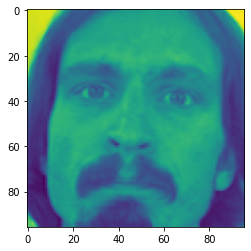

In [ ]:
plt.imshow(X[0].reshape(96,96))

In [ ]:
y = df.drop('Image',axis=1)

In [ ]:
y

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,67.402546,31.842551,29.746749,38.632942,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,22.056816,40.330122,53.299787,29.987657,80.947787,27.977535,38.779298,33.302596,14.798890,35.982760,48.265961,67.029093,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,50.426637,79.683921
7045,66.134400,38.365501,30.478626,39.950198,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,22.056816,40.330122,53.299787,29.987657,80.947787,27.977535,38.779298,33.302596,14.798890,35.982760,47.910346,66.626011,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,50.287397,77.983023
7046,66.690732,36.845221,31.666420,39.685042,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,22.056816,40.330122,53.299787,29.987657,80.947787,27.977535,38.779298,33.302596,14.798890,35.982760,49.462572,67.515161,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,49.462572,78.117120
7047,70.965082,39.853666,30.543285,40.772339,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,22.056816,40.330122,53.299787,29.987657,80.947787,27.977535,38.779298,33.302596,14.798890,35.982760,50.754202,66.724988,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,50.065186,79.586447


In [ ]:
def show_image(X, Y):
    img = np.copy(X)
    for i in range(0,Y.shape[0],2):
        if 0 < Y[i+1] < 96 and 0 < Y[i] < 96:
            img[int(Y[i+1]),int(Y[i]),0] = 255
    plt.imshow(img[:,:,0])

In [ ]:
y = np.array(y)

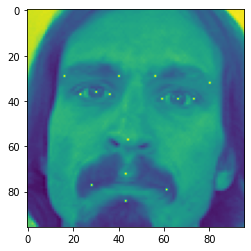

In [ ]:
show_image(X[0],y[0])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [ ]:
%tensorflow_version 1.5
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, MaxPool2D, Flatten, LeakyReLU, Dropout
import tensorflow as tf

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.5`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [ ]:
tf.__version__

'1.15.2'

In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=(96,96,1)))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPool2D(pool_size=(2,2),padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPool2D(pool_size=(2,2),padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPool2D(pool_size=(2,2),padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPool2D(pool_size=(2,2),padding='same'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))



In [ ]:
model = tf.keras.models.load_model('/content/drive/My Drive/model')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-2,decay_steps=10000,decay_rate=0.9)
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(loss='mse',metrics=['accuracy'],optimizer='Adam')

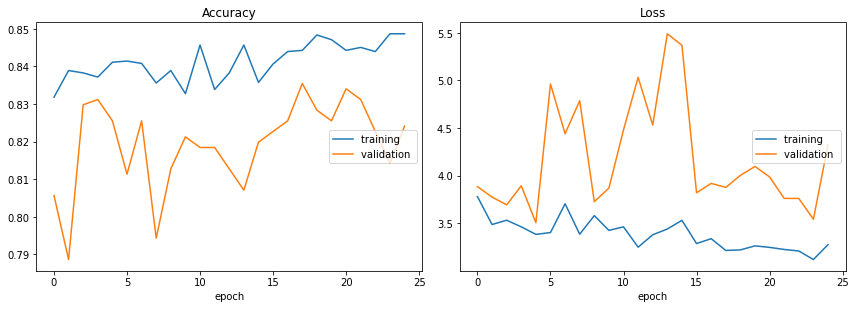

Accuracy
	training         	 (min:    0.832, max:    0.849, cur:    0.849)
	validation       	 (min:    0.789, max:    0.835, cur:    0.824)
Loss
	training         	 (min:    3.121, max:    3.781, cur:    3.277)
	validation       	 (min:    3.507, max:    5.490, cur:    4.329)
6344/6344 [==============================] - 263s 41ms/sample - loss: 3.2766 - acc: 0.8487 - val_loss: 4.3289 - val_acc: 0.8241


In [ ]:
plot_loss = livelossplot.PlotLossesKeras()
model.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=64,callbacks=[plot_loss])

In [ ]:
model.save('/content/drive/My Drive/model')

In [ ]:
s = model.predict(X_test[333].reshape(1,96,96,1))
s

array([[63.284843, 38.437378, 29.344507, 36.005497, 57.209076, 38.849567,
        71.67588 , 39.869053, 35.38381 , 37.480305, 21.540665, 36.825245,
        54.11879 , 30.702543, 78.55751 , 33.44991 , 38.672955, 29.641478,
        14.877583, 29.85491 , 45.700172, 55.876003, 58.75968 , 78.78701 ,
        30.008247, 77.50371 , 44.67798 , 73.544815, 44.24089 , 84.46783 ]],
      dtype=float32)

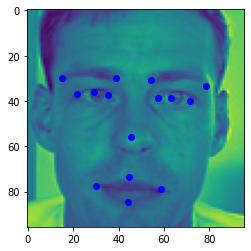

In [ ]:
s = s.reshape(-1)
plt.plot()
plt.imshow(X_test[333].reshape(96,96))
for i in range(1,31,2):
    plt.plot(s[i-1],s[i],'bo')